<a href="https://colab.research.google.com/github/YuriiKlim/AI/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Student_Performance.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

In [29]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,NaN,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.0,NaN,4.0,2.0,23.0
9996,7.0,64.0,Yes,8.0,5.0,58.0
9997,6.0,83.0,NaN,8.0,5.0,74.0
9998,9.0,97.0,Yes,7.0,0.0,95.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9496 non-null   float64
 1   Previous Scores                   9474 non-null   float64
 2   Extracurricular Activities        9495 non-null   object 
 3   Sleep Hours                       9504 non-null   float64
 4   Sample Question Papers Practiced  9487 non-null   float64
 5   Performance Index                 9506 non-null   float64
dtypes: float64(5), object(1)
memory usage: 546.9+ KB


In [31]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9496.000000,9474.000000,9504.000000,9487.000000,9506.000000
mean,4.995577,69.366160,6.526831,4.586908,55.277930
std,2.583372,17.326214,1.695397,2.862329,19.212206
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


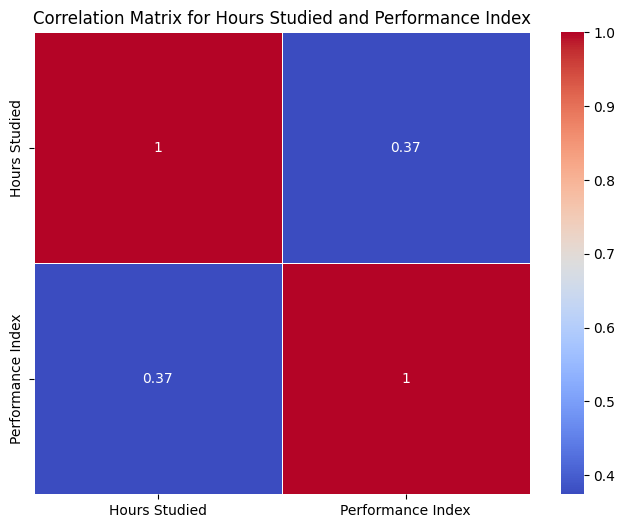

In [32]:
selected_columns = ['Hours Studied', 'Performance Index']

correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Hours Studied and Performance Index')
plt.show()

Text(0, 0.5, 'Performance Index')

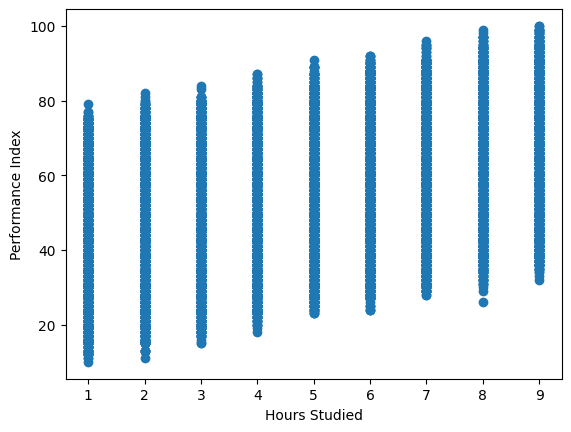

In [33]:
plt.scatter(df['Hours Studied'], df['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')

# Завдання 1
Продивіться дані, видаліть пропущені значення з стовпчика `Perfomance Index`

In [34]:
df_cleaned = df.dropna(subset=['Performance Index'])

In [35]:
df_cleaned.shape

(9506, 6)

# Завдання 2
Розбийте дані на тренувальні та тестові

In [66]:
X = df[['Hours Studied']]
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [38]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (2000, 1) (2000,)
Test shapes: (8000, 1) (8000,)


# Завдання 3
Побудуйте `Pipeline` для заповнення пропущених значень в усіх стовпчиках.
Або заповніть пропуски медіаною кожного стовпчика.

In [57]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
categorical_cols = df_cleaned.select_dtypes(exclude=['number']).columns

numeric_imputer = SimpleImputer(strategy='median')
df_cleaned.loc[:, numeric_cols] = numeric_imputer.fit_transform(df_cleaned[numeric_cols])

categorical_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned.loc[:, categorical_cols] = categorical_imputer.fit_transform(df_cleaned[categorical_cols])
df_cleaned

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,No,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,75.0,No,8.0,5.0,66.0
...,...,...,...,...,...,...
9995,1.0,49.0,No,4.0,2.0,23.0
9996,7.0,64.0,Yes,8.0,5.0,58.0
9997,6.0,83.0,No,8.0,5.0,74.0
9998,9.0,97.0,Yes,7.0,0.0,95.0


In [58]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9506 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9506 non-null   float64
 1   Previous Scores                   9506 non-null   float64
 2   Extracurricular Activities        9506 non-null   object 
 3   Sleep Hours                       9506 non-null   float64
 4   Sample Question Papers Practiced  9506 non-null   float64
 5   Performance Index                 9506 non-null   float64
dtypes: float64(5), object(1)
memory usage: 777.9+ KB


Text(0, 0.5, 'Performance Index')

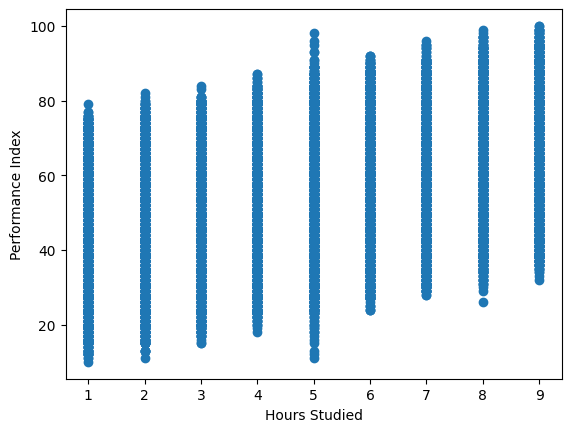

In [60]:
plt.scatter(df_cleaned['Hours Studied'], df_cleaned['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')

# Завдання 4
Побудуйте модель та натренуйте її, виведіть метрики

In [67]:
X = df_cleaned[['Hours Studied']]
y = df_cleaned['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (1901, 1) (1901,)
Test shapes: (7605, 1) (7605,)


In [69]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [72]:
model.coef_

array([2.78956836])

In [71]:
model.intercept_

41.186627365835335

In [75]:
def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [76]:
y_pred = model.predict(X_test)

In [77]:
all_metrics = pd.DataFrame()

all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)

In [78]:
all_metrics

,train,test
MAE,15.51,15.45
RMSE,17.92,17.88
R2,0.13,0.13


# Завдання 5 оптимально
Спробуйте покращити модель